<a href="https://colab.research.google.com/github/Aryanupadhyay23/LightGBM/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import lightgbm as lgb
import time
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=10000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameters for LightGBM
params_level = {
    'boosting_type': 'gbdt',  # depth-wise growth
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'verbose': -1
}

params_leaf = {
    'boosting_type': 'dart',  # Leaf-wise growth
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'verbose': -1
}

# Training the model using level-wise growth
start_time = time.time()
model_level = lgb.train(params_level, lgb.Dataset(X_train, label=y_train), num_boost_round=100)
level_time = time.time() - start_time
y_pred_level = model_level.predict(X_test)
mse_level = mean_squared_error(y_test, y_pred_level)

# Training the model using leaf-wise growth
start_time = time.time()
model_leaf = lgb.train(params_leaf, lgb.Dataset(X_train, label=y_train), num_boost_round=100)
leaf_time = time.time() - start_time
y_pred_leaf = model_leaf.predict(X_test)
mse_leaf = mean_squared_error(y_test, y_pred_leaf)

# Output the results
print(f"Depth-wise growth time: {level_time:.4f} seconds, MSE: {mse_level:.4f}")
print(f"Leaf-wise growth time: {leaf_time:.4f} seconds, MSE: {mse_leaf:.4f}")


Depth-wise growth time: 0.1739 seconds, MSE: 1061.6025
Leaf-wise growth time: 0.3597 seconds, MSE: 4467.9460


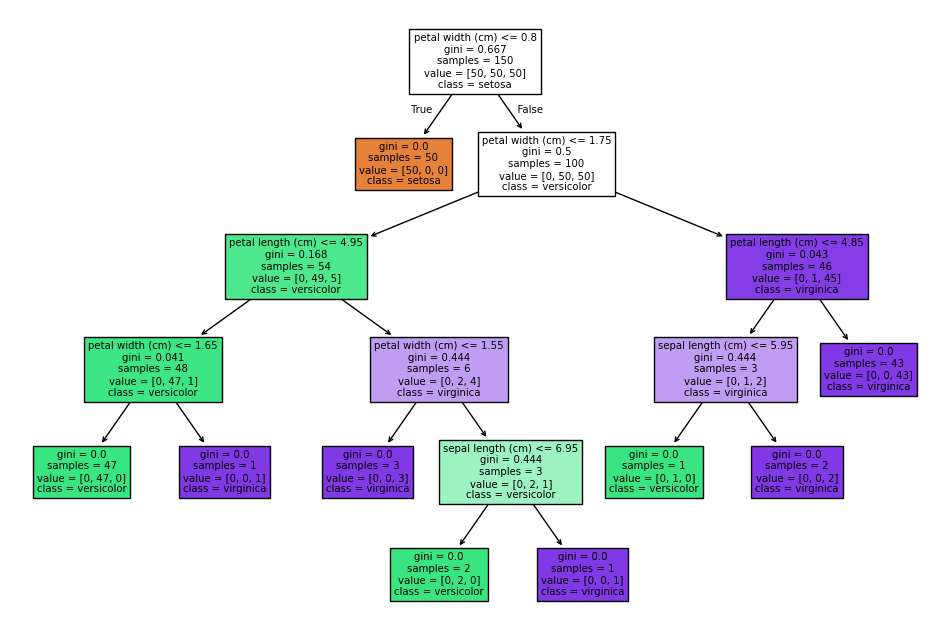

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a decision tree
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Accessing the tree object
tree = clf.tree_

# Function to print the tree nodes
def print_tree_nodes(tree):
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    feature = tree.feature
    threshold = tree.threshold

    # Node number for each node's position in the tree traversal
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # start with the root node id (0) and its parent depth
    while stack:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

        # Print the node details
        print(f"Node {node_id} at depth {node_depth[node_id]}: {'Leaf node' if is_leaves[node_id] else 'Decision node'}")
        if not is_leaves[node_id]:
            print(f" - split on feature {feature[node_id]} at threshold {threshold[node_id]}")
        else:
            print(" - leaf node.")

# Printing all nodes
print_tree_nodes(tree)


Node 0 at depth 0: Decision node
 - split on feature 2 at threshold 2.449999988079071
Node 2 at depth 1: Decision node
 - split on feature 3 at threshold 1.75
Node 6 at depth 2: Decision node
 - split on feature 2 at threshold 4.8500001430511475
Node 8 at depth 3: Leaf node
 - leaf node.
Node 7 at depth 3: Leaf node
 - leaf node.
Node 3 at depth 2: Decision node
 - split on feature 2 at threshold 4.950000047683716
Node 5 at depth 3: Leaf node
 - leaf node.
Node 4 at depth 3: Leaf node
 - leaf node.
Node 1 at depth 1: Leaf node
 - leaf node.


### Speed

In [22]:
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Create a synthetic dataset
X, y = make_classification(
    n_samples=100000, n_features=20,
    n_informative=2, n_redundant=10,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train a LightGBM model
# -----------------------------
start_time = time.time()
lgb_model = LGBMClassifier(n_estimators=100, max_depth=7, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_time = time.time() - start_time
lgb_pred = lgb_model.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)

print(f"LightGBM training time: {lgb_time:.4f} seconds")
print(f"LightGBM accuracy: {lgb_acc:.4f}")

# -----------------------------
# Train an XGBoost model
# -----------------------------
start_time = time.time()
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=7,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"XGBoost training time: {xgb_time:.4f} seconds")
print(f"XGBoost accuracy: {xgb_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM training time: 1.2832 seconds
LightGBM accuracy: 0.8716
XGBoost training time: 1.5810 seconds
XGBoost accuracy: 0.8657


### Memory

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import memory_profiler

@memory_profiler.profile
def train_lgb(X_train, y_train):
    model = LGBMClassifier(n_estimators=100, max_depth=7)
    model.fit(X_train, y_train)

@memory_profiler.profile
def train_xgb(X_train, y_train):
    model = XGBClassifier(n_estimators=100, max_depth=7, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

def main():
    # Create a synthetic dataset
    X, y = make_classification(n_samples=100000, n_features=20,
                               n_informative=2, n_redundant=10,
                               random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and profile models
    print("Training LightGBM...")
    train_lgb(X_train, y_train)

    print("\nTraining XGBoost...")
    train_xgb(X_train, y_train)

if __name__ == "__main__":
    main()


Training LightGBM...
ERROR: Could not find file /tmp/ipython-input-3773617047.py

Training XGBoost...
ERROR: Could not find file /tmp/ipython-input-3773617047.py


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Performance

In [25]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

def load_datasets():
    # Load datasets from sklearn
    bc = datasets.load_breast_cancer()
    digits = datasets.load_digits()
    iris = datasets.load_iris()
    wine = datasets.load_wine()

    return [
        (bc.data, bc.target, 'Breast Cancer'),
        (digits.data, digits.target, 'Digits'),
        (iris.data, iris.target, 'Iris'),
        (wine.data, wine.target, 'Wine')
    ]

def evaluate_models(datasets):
    results = []
    for X, y, name in datasets:
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        # Initialize models
        lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
        xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, use_label_encoder=False, eval_metric='logloss', random_state=42)

        # Train and evaluate LightGBM
        lgb_model.fit(X_train, y_train)
        lgb_acc = accuracy_score(y_test, lgb_model.predict(X_test))

        # Train and evaluate XGBoost
        xgb_model.fit(X_train, y_train)
        xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))

        results.append((name, lgb_acc, xgb_acc))

    return results

def main():
    datasets = load_datasets()
    results = evaluate_models(datasets)
    for name, lgb_acc, xgb_acc in results:
        print(f"{name}:\n  LightGBM Accuracy: {lgb_acc:.2f}, XGBoost Accuracy: {xgb_acc:.2f}\n")

if __name__ == "__main__":
    main()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Breast Cancer:
  LightGBM Accuracy: 0.97, XGBoost Accuracy: 0.95

Digits:
  LightGBM Accuracy: 0.98, XGBoost Accuracy: 0.97

Iris:
  LightGBM Accuracy: 1.00, XGBoost Accuracy: 1.00

Wine:
  LightGBM Accuracy: 1.00, XGBoost Accuracy: 0.93



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

def create_datasets():
    # Generate datasets with varying number of samples
    datasets = []
    sample_sizes = [1000, 5000, 10000, 50000, 100000]  # varying number of rows
    for size in sample_sizes:
        X, y = make_classification(n_samples=size, n_features=20, n_informative=2, n_redundant=10, random_state=42)
        datasets.append((X, y, f"Dataset_{size}"))
    return datasets

def train_and_evaluate(models, datasets):
    results = []
    for X, y, name in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        model_results = {}
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            model_results[model_name] = accuracy
        results.append((name, model_results))
    return results

def main():
    datasets = create_datasets()
    models = {
        "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    results = train_and_evaluate(models, datasets)

    for name, model_results in results:
        print(f"{name}:")
        for model_name, accuracy in model_results.items():
            print(f"  {model_name} Accuracy: {accuracy:.4f}")
        print()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:55:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature nam

Dataset_1000:
  LightGBM Accuracy: 0.9240
  XGBoost Accuracy: 0.9160

Dataset_5000:
  LightGBM Accuracy: 0.9152
  XGBoost Accuracy: 0.9168

Dataset_10000:
  LightGBM Accuracy: 0.9376
  XGBoost Accuracy: 0.9368

Dataset_50000:
  LightGBM Accuracy: 0.9767
  XGBoost Accuracy: 0.9764

Dataset_100000:
  LightGBM Accuracy: 0.8706
  XGBoost Accuracy: 0.8701



### Handling Categorical Variable

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# Generate random data and simulate categorical features
np.random.seed(42)
X_numerical = np.random.randn(10000, 3)  # 3 numerical features
X_categorical = np.random.choice(['low', 'medium', 'high'], size=(10000, 2))  # 2 categorical features
# Convert to DataFrame for easier handling
X = pd.DataFrame(X_numerical, columns=[f'num_{i}' for i in range(3)])
X[[f'cat_{i}' for i in range(2)]] = X_categorical
y = (np.sum(X_numerical, axis=1) > 0).astype(int)  # Create a simple target variable based on numerical features
X



,num_0,num_1,num_2,cat_0,cat_1
0,0.496714,-0.138264,0.647689,medium,high
1,1.523030,-0.234153,-0.234137,high,high
2,1.579213,0.767435,-0.469474,medium,high
3,0.542560,-0.463418,-0.465730,low,medium
4,0.241962,-1.913280,-1.724918,high,medium
...,...,...,...,...,...
9995,-0.343538,-0.394047,0.257996,high,high
9996,1.044292,1.602964,-0.218538,high,low
9997,1.824889,0.876707,-1.232008,high,low
9998,-1.261208,-0.577288,1.444604,low,low


In [28]:
# Ensure categorical columns are of type 'category'
X['cat_0'] = X['cat_0'].astype('category')
X['cat_1'] = X['cat_1'].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify which features are categorical
categorical_features = ['cat_0', 'cat_1']

# Train a LightGBM model, informing it which features are categorical
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train, categorical_feature=categorical_features)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.98


### Handling Missing Data

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.randn(1000, 4)  # 4 features
y = (X[:, 0] + X[:, 1] * 2 + X[:, 2] * 3 + np.random.randn(1000) > 0).astype(int)  # Binary target

# Introduce missing values
missing_samples = np.random.choice(1000, int(1000 * 0.1), replace=False)
missing_features = np.random.choice(4, len(missing_samples), replace=True)
X[missing_samples, missing_features] = np.nan

X



array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,         nan],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       ...,
       [ 1.92344579, -0.77461497, -1.68918304, -0.47126374],
       [-1.97548777,  0.75109945, -2.06508305,  0.02845758],
       [-2.07781182, -0.3202978 ,  1.64337816,  0.36064789]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM classifier
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the LightGBM model with missing values: {accuracy:.2f}")



Accuracy of the LightGBM model with missing values: 0.86


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
